In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%matplotlib inline
!pip install category_encoders


In [ ]:
!pip install yellowbrick


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
excel_file_path = "/content/drive/MyDrive/Colab Notebooks/NCKH_cleaned.xlsx"
df = pd.read_excel(excel_file_path)

In [ ]:
df_copy = df
df_copy.keys()


Index(['Cau1', 'Cau2', 'Cau3', 'Cau4', 'Cau5', 'Cau6', 'Cau7', 'Cau8', 'Cau9',
       'Cau10', 'Cau11', 'Cau12', 'Cau13', 'Cau14', 'Cau15', 'Cau16', 'Cau17',
       'Cau18', 'Cau19', 'Cau20', 'Cau21', 'Cau22', 'Cau23', 'Cau24', 'Cau24*',
       'Cau25', 'Cau26', 'Cau27', 'Cau28', 'Cau29', 'Cau30', 'Cau31', 'Cau32',
       'Cau33', 'Cau34', 'Cau35', 'Cau36', 'Cau37', 'Cau37*'],
      dtype='object')

In [ ]:
cardinality_per_column = df_copy['Cau6'].nunique()
cardinality_per_column

11

In [ ]:

mean_Cau3 = df_copy['Cau3'].mean()
# Thay thế các giá trị bị khuyết trong cột 'col1' bằng giá trị trung bình của cột
df_copy['Cau3'].fillna(mean_Cau3, inplace=True)
df_copy['Cau3'] = df_copy["Cau3"].astype(int)

df_copy['Cau2'].fillna('Unknown', inplace=True)


In [ ]:
df_copy = df_copy.iloc[:, :9]
df_copy

,Cau1,Cau2,Cau3,Cau4,Cau5,Cau6,Cau7,Cau8,Cau9
0,Nữ,Thanh Hóa,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,5,1
1,Nam,Ninh Thuận,2001,4,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,5,1
2,Nam,Thanh Hóa,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Khoa học dữ liệu,6,1
3,Nam,Thừa Thiên Huế,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,1
4,Nam,Hồ Chí Minh,2003,2,Đại học FPT (FPT),Nhóm ngành luật - nhân văn,Ngôn ngữ Anh,5,1
...,...,...,...,...,...,...,...,...,...
852,Nam,Bình Định,2004,2,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật điện/điện tử,5,1
853,Nam,Đắk Lắk,2004,2,Đại học Khoa học Tự nhiên TP.HCM (HCMUS),Nhóm ngành khoa học cơ bản,Công nghệ sinh học,5,1
854,Nữ,An Giang,2003,3,Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...,Nhóm ngành luật - nhân văn,Xã hội học,6,1
855,Nam,Đắk Lắk,2004,1,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,0


In [ ]:
df_copy = df_copy.drop(columns= ['Cau2','Cau8'], axis = 1)

In [ ]:
df_copy

,Cau1,Cau3,Cau4,Cau5,Cau6,Cau7,Cau9
0,Nữ,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1
1,Nam,2001,4,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1
2,Nam,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Khoa học dữ liệu,1
3,Nam,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1
4,Nam,2003,2,Đại học FPT (FPT),Nhóm ngành luật - nhân văn,Ngôn ngữ Anh,1
...,...,...,...,...,...,...,...
852,Nam,2004,2,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật điện/điện tử,1
853,Nam,2004,2,Đại học Khoa học Tự nhiên TP.HCM (HCMUS),Nhóm ngành khoa học cơ bản,Công nghệ sinh học,1
854,Nữ,2003,3,Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...,Nhóm ngành luật - nhân văn,Xã hội học,1
855,Nam,2004,1,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,0


# ***`Thống kê `***

In [ ]:
df_copy['Cau9'] = df_copy['Cau9'].astype(int)

if (df_copy['Cau9'] == 1).any():
  filtered_df = df_copy[df_copy['Cau9'] == 1]
  thong_ke = filtered_df.groupby(['Cau1', 'Cau5', 'Cau6', 'Cau9']).size().reset_index(name='Số sinh viên')
  thong_ke = thong_ke.sort_values(by='Số sinh viên', ascending=False)

df_thongke = pd.DataFrame(thong_ke)
df_thongke


,Cau1,Cau5,Cau6,Cau9,Số sinh viên
26,Nam,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,1,47
115,Nữ,Đại học Kinh tế – Luật (UEL),Nhóm những ngành kinh tế,1,38
106,Nữ,Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...,Nhóm ngành luật - nhân văn,1,27
69,Nam,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",1,26
51,Nam,Đại học Mở TP.HCM (OU),Nhóm các ngành công nghệ - thông tin,1,25
...,...,...,...,...,...
60,Nam,Đại học Nông Lâm TP.HCM (NLU),Nhóm những ngành kinh tế,1,1
58,Nam,Đại học Nông Lâm TP.HCM (NLU),Nhóm ngành báo chí - khoa học và xã hội,1,1
55,Nam,Đại học Ngân hàng TP.HCM (HUB),Nhóm ngành báo chí - khoa học và xã hội,1,1
54,Nam,Đại học Ngân hàng TP.HCM (HUB),Nhóm các ngành công nghệ - thông tin,1,1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7899 (\N{LATIN SMALL LETTER O WITH HORN AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) m

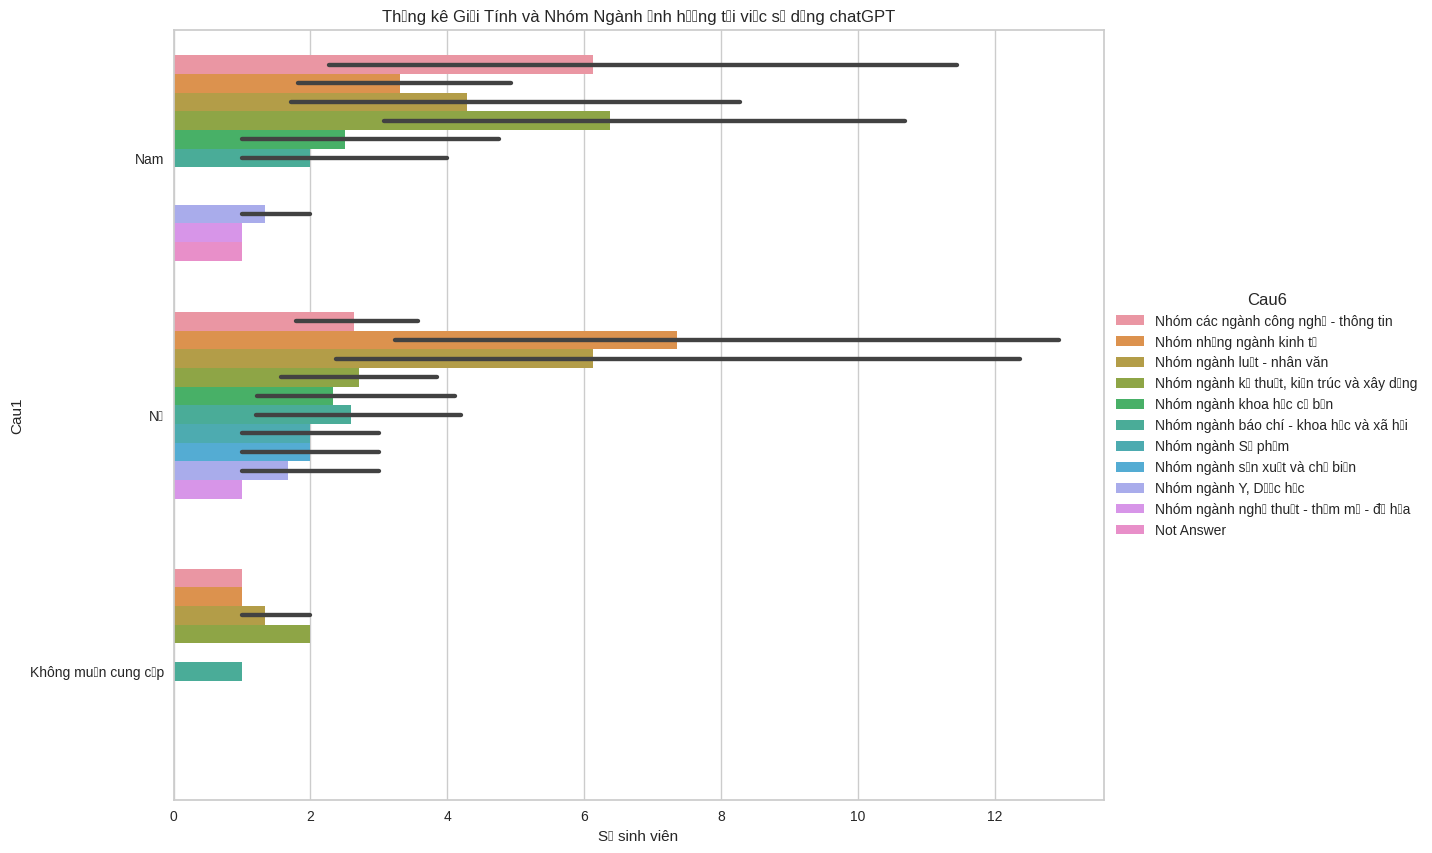

In [ ]:
# Visualize the result using a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x='Số sinh viên', y='Cau1', data=df_thongke, hue='Cau6')
plt.title('Thống kê Giới Tính và Nhóm Ngành ảnh hưởng tới việc sử dụng chatGPT')
plt.xlabel('Số sinh viên')
plt.ylabel('Cau1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Cau6')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRC

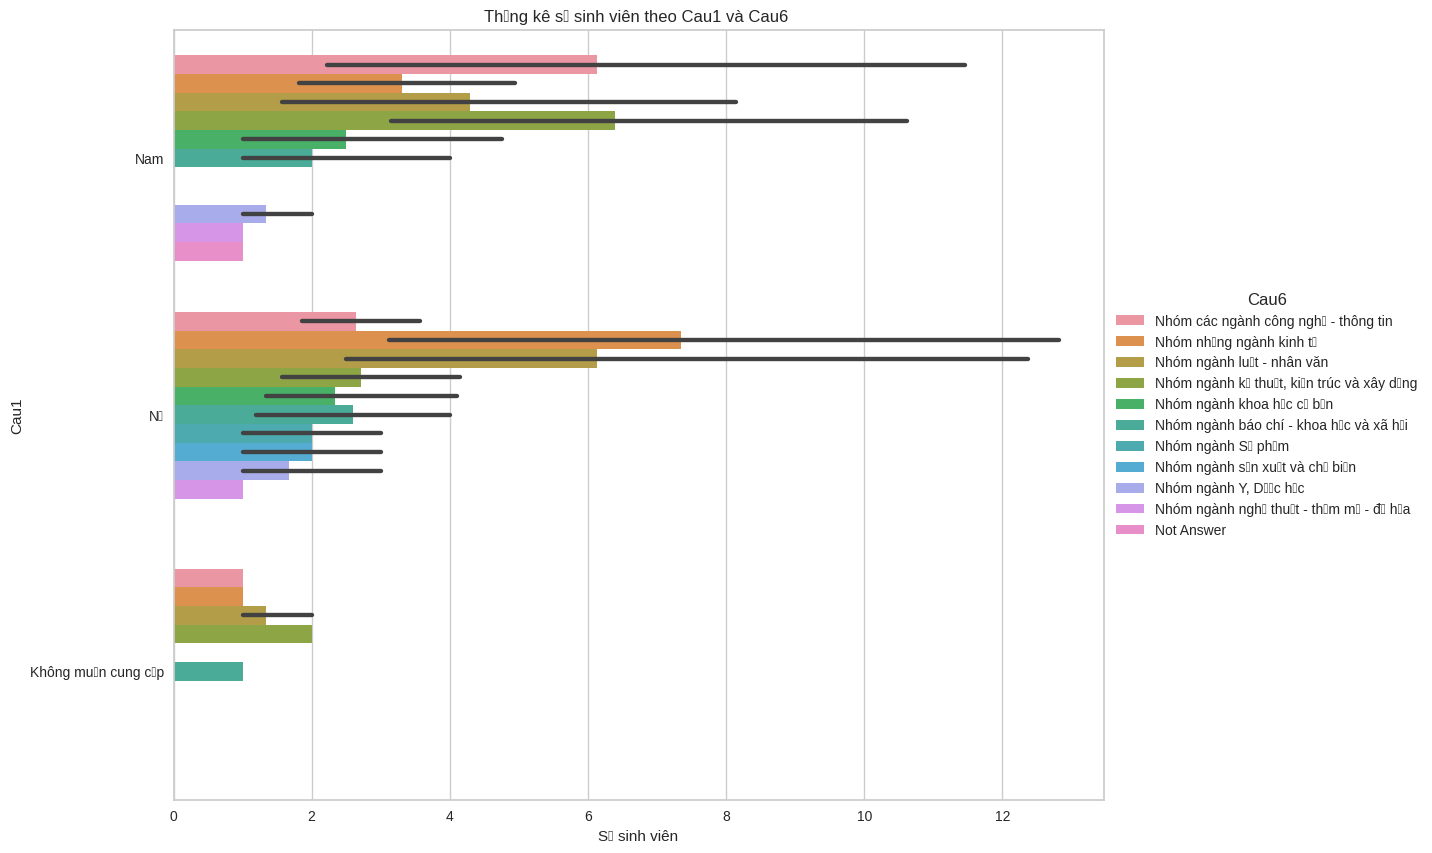

In [ ]:
# Visualize the result using a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x='Số sinh viên', y='Cau1', data=df_thongke[0:200], hue='Cau6')
plt.title('Thống kê số sinh viên theo Cau1 và Cau6 ')
plt.xlabel('Số sinh viên')
plt.ylabel('Cau1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Cau6')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7885 (\N{LATIN SMALL LETTER O WITH DOT BELOW}) missing

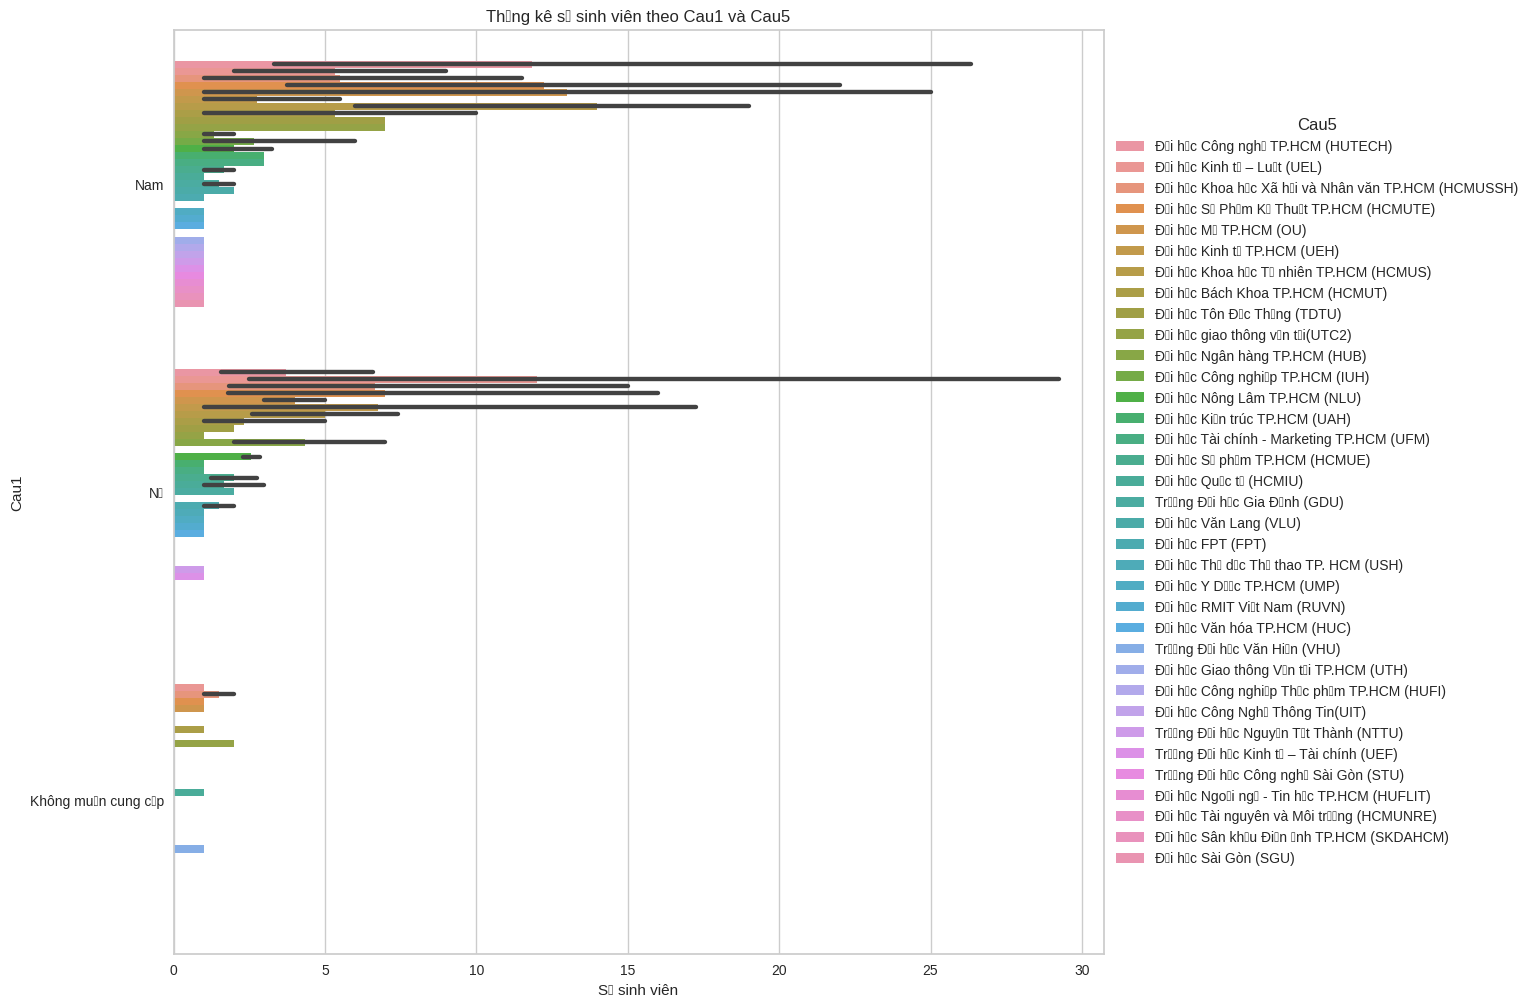

In [ ]:
# Visualize the result using a bar chart
plt.figure(figsize=(12, 12))
sns.barplot(x='Số sinh viên', y='Cau1', data=thong_ke, hue='Cau5')
plt.title('Thống kê số sinh viên theo Cau1 và Cau5')
plt.xlabel('Số sinh viên')
plt.ylabel('Cau1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Cau5')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7841 (\N{LATIN SMALL LETTER A WITH DOT BELOW}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7885 (\N{LATIN SMALL LETTER O WITH DOT BELOW}) missing

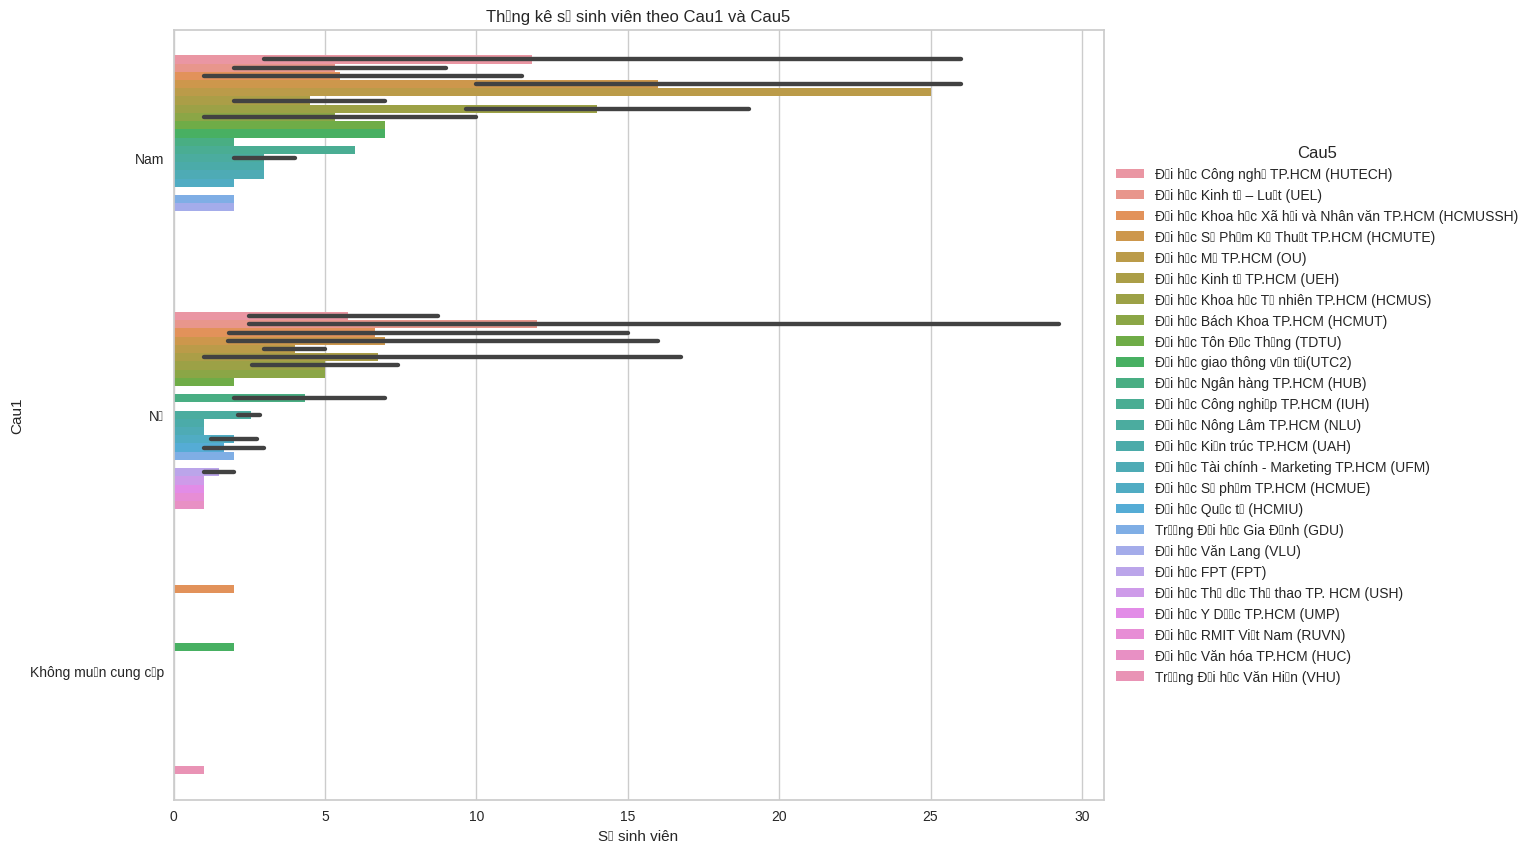

In [ ]:
# Visualize the result using a bar chart
plt.figure(figsize=(12, 10))
sns.barplot(x='Số sinh viên', y='Cau1', data=thong_ke[0:100], hue='Cau5')
plt.title('Thống kê số sinh viên theo Cau1 và Cau5')
plt.xlabel('Số sinh viên')
plt.ylabel('Cau1')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Cau5')
plt.show()

In [ ]:

if (df_copy['Cau9'] == 1).any():
  filtered_df_ssv = df_copy[df_copy['Cau9'] == 1]
  thong_ke_ssv = filtered_df_ssv.groupby(['Cau6', 'Cau7', 'Cau9']).size().reset_index(name='Số sinh viên')
  thong_ke_ssv = thong_ke_ssv.sort_values(by='Số sinh viên', ascending=False)

df_thongke_ssv = pd.DataFrame(thong_ke_ssv)
df_thongke_ssv


,Cau6,Cau7,Cau9,Số sinh viên
2,Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,165
86,Nhóm những ngành kinh tế,Quản trị Kinh doanh,1,70
38,"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật điện/điện tử,1,31
49,Nhóm ngành luật - nhân văn,Ngôn ngữ Anh,1,27
37,"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật ô tô/Cơ khí máy/Cơ điện tử,1,27
...,...,...,...,...
51,Nhóm ngành luật - nhân văn,Ngôn ngữ Hàn Quốc,1,1
54,Nhóm ngành luật - nhân văn,Ngôn ngữ Tây Ban Nha,1,1
55,Nhóm ngành luật - nhân văn,Ngôn ngữ Đức,1,1
56,Nhóm ngành luật - nhân văn,Nhân học,1,1


# ***`Clustering`***


In [ ]:
df_copy

,Cau1,Cau3,Cau4,Cau5,Cau6,Cau7,Cau9
0,Nữ,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1
1,Nam,2001,4,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1
2,Nam,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Khoa học dữ liệu,1
3,Nam,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1
4,Nam,2003,2,Đại học FPT (FPT),Nhóm ngành luật - nhân văn,Ngôn ngữ Anh,1
...,...,...,...,...,...,...,...
852,Nam,2004,2,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật điện/điện tử,1
853,Nam,2004,2,Đại học Khoa học Tự nhiên TP.HCM (HCMUS),Nhóm ngành khoa học cơ bản,Công nghệ sinh học,1
854,Nữ,2003,3,Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...,Nhóm ngành luật - nhân văn,Xã hội học,1
855,Nam,2004,1,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,0


In [ ]:
filtered_df = df_copy[df_copy['Cau9'] == 1]
print(filtered_df)

    Cau1  Cau3  Cau4                                               Cau5  \
0     Nữ  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
1    Nam  2001     4                  Đại học Công nghệ TP.HCM (HUTECH)   
2    Nam  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
3    Nam  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
4    Nam  2003     2                                  Đại học FPT (FPT)   
..   ...   ...   ...                                                ...   
850   Nữ  2002     1           Đại học Khoa học Tự nhiên TP.HCM (HCMUS)   
851  Nam  2004     2  Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...   
852  Nam  2004     2           Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE)   
853  Nam  2004     2           Đại học Khoa học Tự nhiên TP.HCM (HCMUS)   
854   Nữ  2003     3  Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...   

                                           Cau6  \
0          Nhóm các ngành công nghệ - thông tin 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with multiple features
# List of features to be label encoded
features_to_encode = ['Cau1', 'Cau3', 'Cau5', 'Cau6', 'Cau7']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each feature
for feature in features_to_encode:
    filtered_df[feature] = label_encoder.fit_transform(filtered_df[feature]) + 1

# Display the resulting DataFrame
print(filtered_df)



     Cau1  Cau3  Cau4  Cau5  Cau6  Cau7  Cau9
0       3     9     2    10     1     6     1
1       2     7     4    10     1     6     1
2       2     9     2    10     1    15     1
3       2     9     2    10     1     6     1
4       2     9     2    11     7    45     1
..    ...   ...   ...   ...   ...   ...   ...
850     3     8     1    13     5    17     1
851     2    10     2    14     7    89     1
852     2    10     2    26     6    36     1
853     2    10     2    13     5     5     1
854     3     9     3    14     7    89     1

[616 rows x 7 columns]


<ipython-input-122-c0b7ce57c73b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[feature] = label_encoder.fit_transform(filtered_df[feature]) + 1
<ipython-input-122-c0b7ce57c73b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[feature] = label_encoder.fit_transform(filtered_df[feature]) + 1
<ipython-input-122-c0b7ce57c73b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
filtered_df.drop(columns = 'Cau9', axis = 1)


,Cau1,Cau3,Cau4,Cau5,Cau6,Cau7
0,3,9,2,10,1,6
1,2,7,4,10,1,6
2,2,9,2,10,1,15
3,2,9,2,10,1,6
4,2,9,2,11,7,45
...,...,...,...,...,...,...
850,3,8,1,13,5,17
851,2,10,2,14,7,89
852,2,10,2,26,6,36
853,2,10,2,13,5,5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

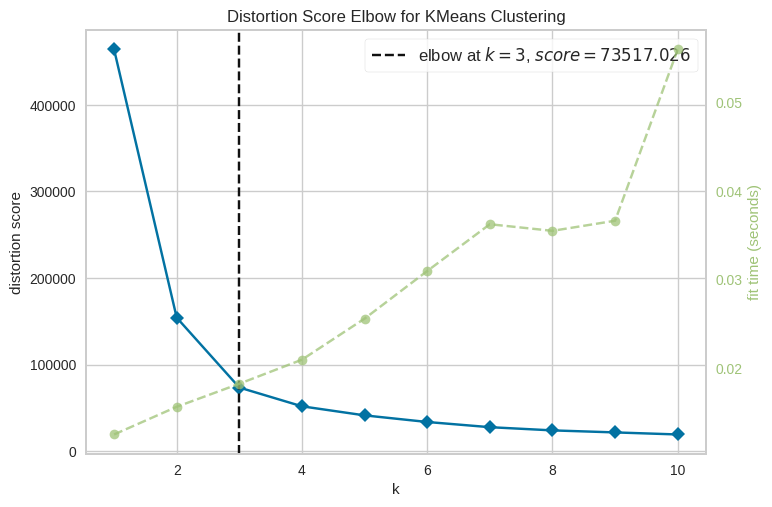

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



# Use the elbow method to find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))  # Try different values of K
visualizer.fit(filtered_df)
visualizer.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_df['cluster'] = kmeans.fit_predict(filtered_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-125-a2c0f40c28e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster'] = kmeans.fit_predict(filtered_df)


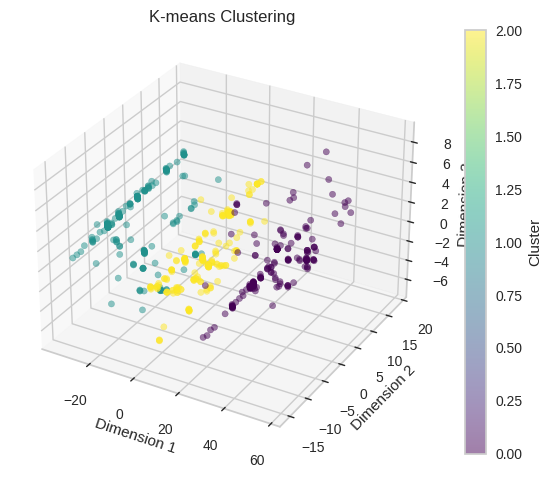

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming filtered_df is your DataFrame
pca = PCA(n_components=3)
features_pca = pca.fit_transform(filtered_df)

# Plot the clustered data using the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=filtered_df['cluster'], cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('K-means Clustering')

# Add colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


In [ ]:
  filtered_df

,Cau1,Cau3,Cau4,Cau5,Cau6,Cau7,Cau9,cluster
0,3,9,2,10,1,6,1,1
1,2,7,4,10,1,6,1,1
2,2,9,2,10,1,15,1,1
3,2,9,2,10,1,6,1,1
4,2,9,2,11,7,45,1,2
...,...,...,...,...,...,...,...,...
850,3,8,1,13,5,17,1,1
851,2,10,2,14,7,89,1,0
852,2,10,2,26,6,36,1,2
853,2,10,2,13,5,5,1,1


In [ ]:
grouped_df = filtered_df.groupby('cluster')

for cluster, group in grouped_df:
    print(f"Cluster {cluster}:")
    print(group)


Cluster 0:
     Cau1  Cau3  Cau4  Cau5  Cau6  Cau7  Cau9  cluster
5       3    10     1    27     7    82     1        0
12      3     9     2    27     2    70     1        0
16      2     9     3     8    10    62     1        0
18      3     9     2    29    10    62     1        0
19      3     9     3     4    10    62     1        0
..    ...   ...   ...   ...   ...   ...   ...      ...
843     3    10     2    14     7    89     1        0
844     2     8     4    14     7    85     1        0
845     3    10     2    34     3    68     1        0
851     2    10     2    14     7    89     1        0
854     3     9     3    14     7    89     1        0

[179 rows x 8 columns]
Cluster 1:
     Cau1  Cau3  Cau4  Cau5  Cau6  Cau7  Cau9  cluster
0       3     9     2    10     1     6     1        1
1       2     7     4    10     1     6     1        1
2       2     9     2    10     1    15     1        1
3       2     9     2    10     1     6     1        1
6       2     9    

In [ ]:
# Assuming df_copy is your original DataFrame and df is the DataFrame with added cluster labels
merged_df = pd.concat([df_copy, filtered_df['cluster']], axis=1)

# Print the mapping between df_copy and df
print("Mapping between df_copy and df:")
print(merged_df)


Mapping between df_copy and df:
    Cau1  Cau3  Cau4                                               Cau5  \
0     Nữ  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
1    Nam  2001     4                  Đại học Công nghệ TP.HCM (HUTECH)   
2    Nam  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
3    Nam  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
4    Nam  2003     2                                  Đại học FPT (FPT)   
..   ...   ...   ...                                                ...   
852  Nam  2004     2           Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE)   
853  Nam  2004     2           Đại học Khoa học Tự nhiên TP.HCM (HCMUS)   
854   Nữ  2003     3  Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...   
855  Nam  2004     1                  Đại học Công nghệ TP.HCM (HUTECH)   
856   Nữ  2003     3  Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...   

                                           Cau6                   C

In [ ]:
# Assuming merged_df is your DataFrame
merged_df = merged_df[merged_df['Cau9'] == 1]
merged_df.drop(columns='Cau9', axis = 1)
# Print the selected rows
print(merged_df)


    Cau1  Cau3  Cau4                                               Cau5  \
0     Nữ  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
1    Nam  2001     4                  Đại học Công nghệ TP.HCM (HUTECH)   
2    Nam  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
3    Nam  2003     2                  Đại học Công nghệ TP.HCM (HUTECH)   
4    Nam  2003     2                                  Đại học FPT (FPT)   
..   ...   ...   ...                                                ...   
850   Nữ  2002     1           Đại học Khoa học Tự nhiên TP.HCM (HCMUS)   
851  Nam  2004     2  Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...   
852  Nam  2004     2           Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE)   
853  Nam  2004     2           Đại học Khoa học Tự nhiên TP.HCM (HCMUS)   
854   Nữ  2003     3  Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...   

                                           Cau6  \
0          Nhóm các ngành công nghệ - thông tin 

In [ ]:
merged_df['cluster'] = merged_df['cluster'].astype(int)
if (merged_df['cluster'] == 1).any():
  filtered_df_cluster = merged_df[merged_df['cluster'] == 1]
  thong_ke_cluster = filtered_df_cluster.groupby(['Cau1','Cau3', 'Cau4', 'Cau5', 'Cau6', 'Cau7', 'cluster']).size().reset_index(name='Số sinh viên')
  thong_ke_cluster = thong_ke_cluster.sort_values(by='Số sinh viên', ascending=False)

df_thongke_cluster = pd.DataFrame(thong_ke_cluster)
df_thongke_cluster




,Cau1,Cau3,Cau4,Cau5,Cau6,Cau7,cluster,Số sinh viên
27,Nam,2002,3,Đại học Mở TP.HCM (OU),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,17
38,Nam,2003,2,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,11
32,Nam,2002,4,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,7
52,Nam,2003,3,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,6
47,Nam,2003,3,Đại học Công nghệ TP.HCM (HUTECH),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,6
...,...,...,...,...,...,...,...,...
50,Nam,2003,3,Đại học Kinh tế – Luật (UEL),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,1
49,Nam,2003,3,Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...,Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,1
46,Nam,2003,3,Trường Đại học Gia Định (GDU),Nhóm các ngành công nghệ - thông tin,Công nghệ thông tin,1,1
45,Nam,2003,2,Đại học Y Dược TP.HCM (UMP),Nhóm ngành khoa học cơ bản,Khoa học tự nhiên cơ bản (Toán/Lý/Hóa/Sinh),1,1


In [ ]:
merged_df['cluster'] = merged_df['cluster'].astype(int)
if (merged_df['cluster'] == 2).any():
  filtered_df_cluster = merged_df[merged_df['cluster'] == 2]
  thong_ke_cluster = filtered_df_cluster.groupby(['Cau1','Cau3', 'Cau4', 'Cau5', 'Cau6', 'Cau7', 'cluster']).size().reset_index(name='Số sinh viên')
  thong_ke_cluster = thong_ke_cluster.sort_values(by='Số sinh viên', ascending=False)

df_thongke_cluster = pd.DataFrame(thong_ke_cluster)
df_thongke_cluster




,Cau1,Cau3,Cau4,Cau5,Cau6,Cau7,cluster,Số sinh viên
76,Nam,2004,2,Đại học giao thông vận tải(UTC2),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật xây dựng,2,5
29,Nam,2002,4,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật ô tô/Cơ khí máy/Cơ điện tử,2,4
22,Nam,2002,3,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật ô tô/Cơ khí máy/Cơ điện tử,2,4
12,Nam,2001,4,Đại học Khoa học Tự nhiên TP.HCM (HCMUS),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật điện/điện tử,2,3
39,Nam,2003,2,Đại học Khoa học Tự nhiên TP.HCM (HCMUS),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật điện/điện tử,2,3
...,...,...,...,...,...,...,...,...
53,Nam,2003,3,Đại học Nông Lâm TP.HCM (NLU),Nhóm ngành báo chí - khoa học và xã hội,Môi trường,2,1
52,Nam,2003,3,Đại học Kiến trúc TP.HCM (UAH),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Kỹ thuật xây dựng,2,1
51,Nam,2003,3,Đại học Kinh tế – Luật (UEL),Nhóm ngành luật - nhân văn,Luật,2,1
49,Nam,2003,3,Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...,Nhóm ngành luật - nhân văn,Ngôn ngữ Anh,2,1


In [ ]:
merged_df['cluster'] = merged_df['cluster'].astype(int)
if (merged_df['cluster'] == 0).any():
  filtered_df_cluster = merged_df[merged_df['cluster'] == 0]
  thong_ke_cluster = filtered_df_cluster.groupby(['Cau1','Cau3', 'Cau4', 'Cau5', 'Cau6', 'Cau7', 'cluster']).size().reset_index(name='Số sinh viên')
  thong_ke_cluster = thong_ke_cluster.sort_values(by='Số sinh viên', ascending=False)

df_thongke_cluster = pd.DataFrame(thong_ke_cluster)
df_thongke_cluster




,Cau1,Cau3,Cau4,Cau5,Cau6,Cau7,cluster,Số sinh viên
116,Nữ,2004,1,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),Nhóm những ngành kinh tế,Quản lý Công nghiệp,0,11
77,Nữ,2002,4,Đại học Kinh tế – Luật (UEL),Nhóm những ngành kinh tế,Quản trị Kinh doanh,0,5
111,Nữ,2004,1,Đại học Khoa học Xã hội và Nhân văn TP.HCM (HC...,Nhóm ngành luật - nhân văn,Xã hội học,0,3
8,Nam,2001,4,Đại học Khoa học Tự nhiên TP.HCM (HCMUS),"Nhóm ngành kỹ thuật, kiến trúc và xây dựng",Điện tử viễn thông,0,3
113,Nữ,2004,1,Đại học Mở TP.HCM (OU),Nhóm những ngành kinh tế,Quản trị Kinh doanh,0,3
...,...,...,...,...,...,...,...,...
43,Nam,2004,1,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),Nhóm những ngành kinh tế,Quản lý Công nghiệp,0,1
42,Nam,2004,1,Đại học Sư Phạm Kỹ Thuật TP.HCM (HCMUTE),Nhóm ngành nghệ thuật - thẩm mỹ - đồ họa,Thiết kế Đồ họa,0,1
41,Nam,2004,1,Đại học Mở TP.HCM (OU),Nhóm những ngành kinh tế,Quản trị Kinh doanh,0,1
40,Nam,2004,1,Đại học Kinh tế – Luật (UEL),Nhóm những ngành kinh tế,Quản trị Kinh doanh,0,1
